In [1]:
using Plots
using DelimitedFiles
using StatsBase
using Statistics

include("../src/utilities.jl")

areaAverage

In [17]:
function readOptions(f)
    options = Dict()
    file = perplex_f = join(split(f, "/")[1:end-1], "/")*"/inversion_options.csv"
    params = readdlm(file, ',', header = false)
    for row in 1:size(params,1)
        options[params[row,1]] = params[row,2]
    end
    perplex_f = join(split(f, "/")[1:end-2], "/")*"/resampleEarthChem_options.csv"
    params = readdlm(perplex_f, ',', header = false)
    for row in 1:size(params,1)
        options[params[row,1]] = params[row,2]
    end
    return options
end
o = readOptions("../data/base_single/base/results-lower.csv")

Dict{Any, Any} with 22 entries:
  "data_source_uncertainty" => 0.0
  "data_prefix"             => "base_single"
  "test_comp"               => "[66.6, 63.5, 53.4]"
  "model"                   => "rejection"
  "num_runs"                => 500
  "age_model"               => "earthchem"
  "data"                    => "resources/igncn1.mat"
  "exhume"                  => 5.0
  "formation_temp"          => 550.0
  "name"                    => "base"
  "fraction_crack"          => 0.05
  "num_samples"             => 100000
  "crack"                   => 0.007
  "huang"                   => ""
  "test_source"             => "base_single"
  "data_source"             => "Spiral"
  "num_invert"              => 252
  "alteration_fraction"     => 0.01
  "dabie"                   => ""
  "weight"                  => "latlongage"
  "bin_geotherms"           => 10
  "wet_crack"               => false

In [72]:
layer = "upper"

"upper"

In [73]:
runs = []
params = []

Any[]

In [74]:
p = plot()

for i in 1:10
    f = "../data/sensitivity_$i/sensitivity/results-$layer.csv"
    dat, h = readdlm(f, ',', header=true)
    means = runs_means(dat[:,findfirst(isequal("SiO2"), h[:])], 252)
    append!(runs, [means])
    stephist!(p, means, fill=true,alpha=.2, lineweight=2, linealpha=1, bins=10, color=:black, normalize=:pdf)
    
    append!(params,[readOptions(f)])
end

Fraction nan: 0.00875Fraction nan: 0.0017857142857142857Fraction nan: 0.0026785714285714286Fraction nan: 0.002996031746031746Fraction nan: 0.0021031746031746033Fraction nan: 0.0032936507936507935Fraction nan: 0.0026984126984126986Fraction nan: 0.0026587301587301586Fraction nan: 0.002003968253968254Fraction nan: 0.0030753968253968253

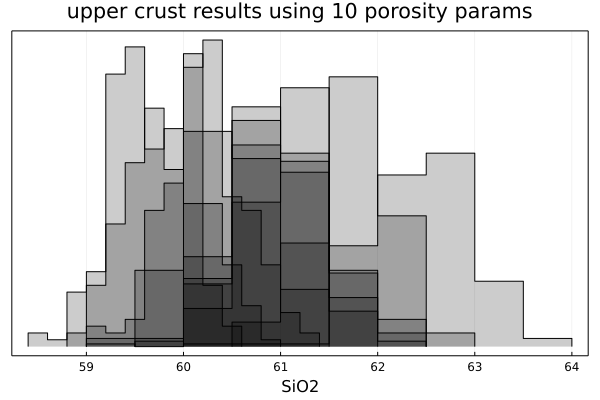

In [75]:
plot!(legend=false, framestyle=:box, yticks=false, xlabel="SiO2", title="$layer crust results using 10 porosity params")
#savefig("viz/porosity_sensitivity.pdf")

In [86]:
means = [mean(p) for p in runs]
stds = [std(p) for p in runs]
plots = []

if layer=="upper"
    targets = ["fraction_crack", "alteration_fraction","crack", "wet_crack"]
    #targets = ["formation_temp", "exhume"]
else
    targets = ["formation_temp", "exhume"]
end

for param in targets
    if param == "wet_crack"
        append!(plots, [scatter(means, xerr=stds, [f[param] for f in params], ylabel=param, legend=false, ylims=(-.5,1.5), framestyle=:box)])
    else
        append!(plots, [scatter(means, xerr=stds, [f[param] for f in params], ylabel=param, legend=false, framestyle=:box)])
    end
end

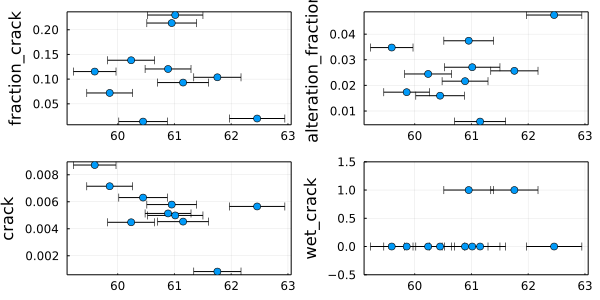

In [89]:
plot(plots..., size=(600,300))
#savefig("viz/xaxis_$(layer)_crust_sensitivity.pdf")

In [19]:


readOptions("../data/base_single/base/inversion_options.csv")

Dict{Any, Any} with 22 entries:
  "data_source_uncertainty" => 0.0
  "data_prefix"             => "base_single"
  "test_comp"               => "[66.6, 63.5, 53.4]"
  "model"                   => "rejection"
  "num_runs"                => 500
  "age_model"               => "earthchem"
  "data"                    => "resources/igncn1.mat"
  "exhume"                  => 5.0
  "formation_temp"          => 550.0
  "name"                    => "base"
  "fraction_crack"          => 0.05
  "num_samples"             => 100000
  "crack"                   => 0.007
  "huang"                   => ""
  "test_source"             => "base_single"
  "data_source"             => "Spiral"
  "num_invert"              => 252
  "alteration_fraction"     => 0.01
  "dabie"                   => ""
  "weight"                  => "latlongage"
  "bin_geotherms"           => 10
  "wet_crack"               => false

In [24]:
std

std (generic function with 4 methods)

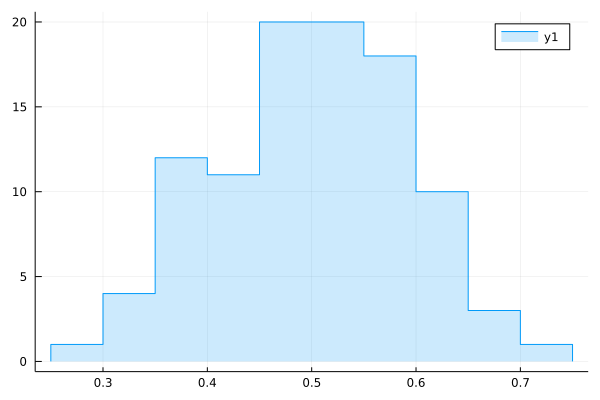

In [27]:
stephist(rands, fill=true, alpha=.2, lineweight=2, linealpha=1)